# Earnings Based on College Majors

The dataset recent-grads.csv contains data on job outcomes from students who graduated from college between the years 2010 and 2012.  The following information is included in this dataset (additional data is also available beyond this list):

- `Rank` - Rank by median earnings (the dataset is ordered by this column)
- `Major_code` - Major code
- `Major` - Major description
- `Major_category` - Category of major
- `Total` - Total number of people with major
- `Sample_size` - Sample size (unweighted) of full-time
- `Men` - Male graduates
- `Women` - Female graduates
- `ShareWomen` - Women as share of total
- `Employed` - Number employed
- `Median` - Median salary of full-time, year-round workers
- `Low_wage_jobs` - Number in low-wage service jobs
- `Full_time` - Number employed 35 hours or more
- `Part_time` - Number employed less than 35 hours

We will use this dataset to explore different data visualization options primarily using pandas.

In [1]:
import pandas as pd
import matplotlib as plt

# display plots inline
%matplotlib inline

In [2]:
# read dataset into dataframe
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
# review first row as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# review head
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# review tail
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# review descriptive statistics for numerical columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# drop rows with missing values

# total number of rows in original data
raw_data_count = recent_grads.shape[0]

In [8]:
# drop rows with missing values
recent_grads = recent_grads.dropna()
# number of rows remaining in data
cleaned_data_count = recent_grads.shape[0]

In [9]:
print('raw_data_count: ', raw_data_count)
print('cleaned_data_count: ', cleaned_data_count)

raw_data_count:  173
cleaned_data_count:  172


Since the count dropped from 173 to 172, only one row in our dataset had missing values.  Now that we don't have missing values, we will be able to use matplotlib to explore the data.

## Review Scatter Plots

We will look at a few scatter plots of some of the elements of our data to begin.

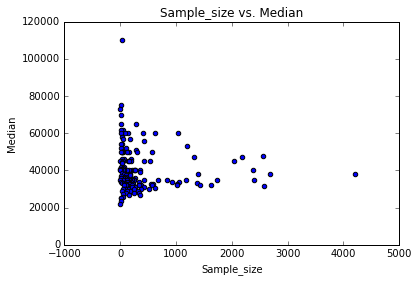

In [10]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

From this first plot, we see that there are a number of points with a small sample size (very close to zero).  Most of the sample sizes are less than 1,000, though there are a few clustered between 2,000 and 3,000, and there is one with over 4,000.

Generally the median salary is between 20,000 and 80,00, though there is an outlier above 100,000.

Some of the most popular majors appear to have relatively lower median earnings (near 40,000). Most of the higher median earnings have smaller sample sizes.

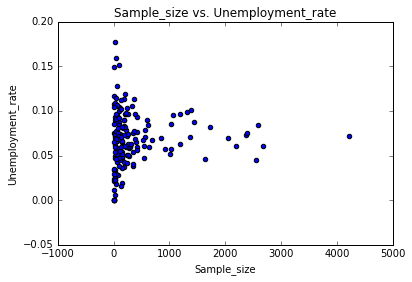

In [11]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')

From this plot, we see that most of the unemployment rates are between 0.05 and 0.10.  However, the data ranges from 0 to about 0.18.

There are small samples for the highest unemployment rates, but also for the lowest unemployment rates.  It appears that both the highest and lowest unemployment rate majors are less popular, while the "average" unemployment rate majors are more popular.

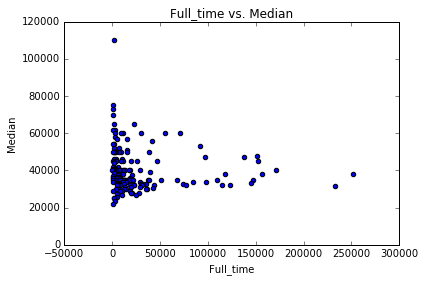

In [12]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

In this plot, it appears that those majors with more full time employees tend towards lower median salaries.  As full time counts increase, the top end of our median salary range seems to be falling.

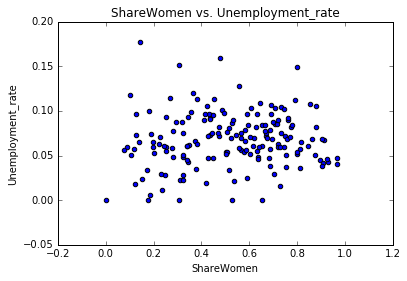

In [13]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

In the above plot, there is no correlation between the unemployment rate and the share of women in the major.

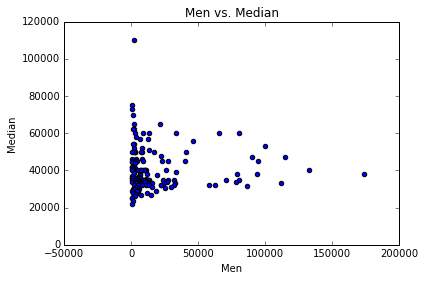

In [14]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

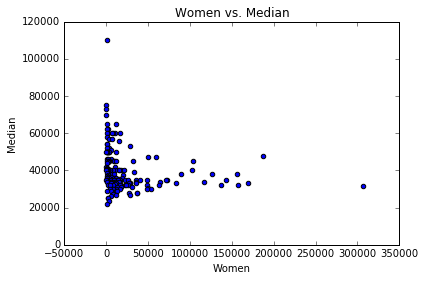

In [15]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')

For both men and women, when there are a small number of graduates, the median salaries look similar.  However, as the number of graduates increases, the median salaries for women seem to drop off much more sharply than for men.

## Review Histograms

We will next use histograms to review several of the columns of our data.

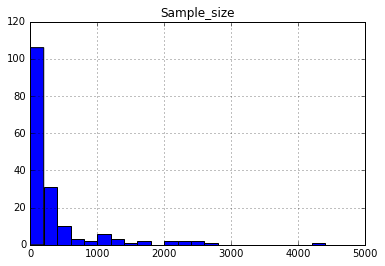

In [16]:
ax = recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
ax.set_title('Sample_size')

This data is primarily composed of many small majors.

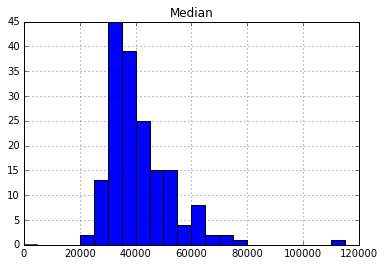

In [17]:
ax = recent_grads['Median'].hist(bins=24, range=(0,120000))
ax.set_title('Median')

Most of the median salaries are in the 30,000 to 50,000 range, though there are several with much larger salaries.

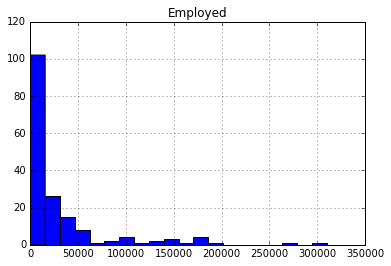

In [18]:
ax = recent_grads['Employed'].hist(bins=20, range=(0,310000))
ax.set_title('Employed')

The vast majority of majors have less than 50,000 employed.

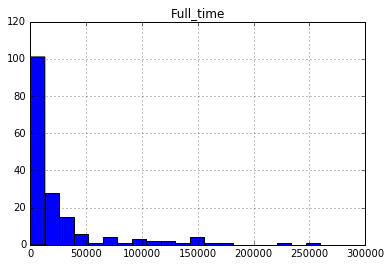

In [19]:
ax = recent_grads['Full_time'].hist(bins=20, range=(0,260000))
ax.set_title('Full_time')

The pattern for full-time employment looks very similar to the number employed, with the numbers reduced somewhat (accounting for the part-time employment).

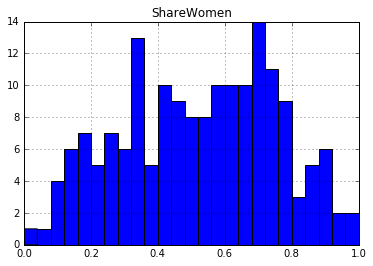

In [20]:
ax = recent_grads['ShareWomen'].hist(bins=25, range=(0,1))
ax.set_title('ShareWomen')

We can see from the above that there are some majors that are predominantly female, while others are predominantly male.  There are more majors that are almost exclusively female (the three bars on the right) than there are that are almost exclusively male (the three bars on the left).

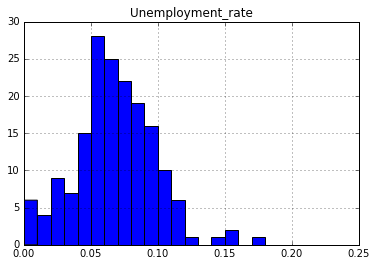

In [21]:
ax = recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.25))
ax.set_title('Unemployment_rate')

Most majors have unemployment rates between 5% and 10%, though there are some with rates outside this range.

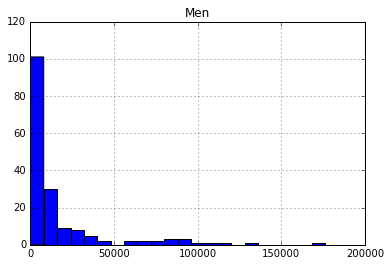

In [22]:
ax = recent_grads['Men'].hist(bins=25, range=(0,200000))
ax.set_title('Men')

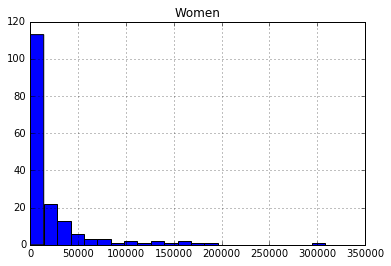

In [23]:
ax = recent_grads['Women'].hist(bins=25, range=(0,350000))
ax.set_title('Women')

For both men and women, most majors have small numbers of graduates.  However, there are some majors for each gender that have very large numbers of graduates.

## Review Scatter Matrix Plots

Next we will review scatter matrix plots, which combine scatter plots and histograms to better explore these relationships.

In [24]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43c0137be0>,
      dtype=object)

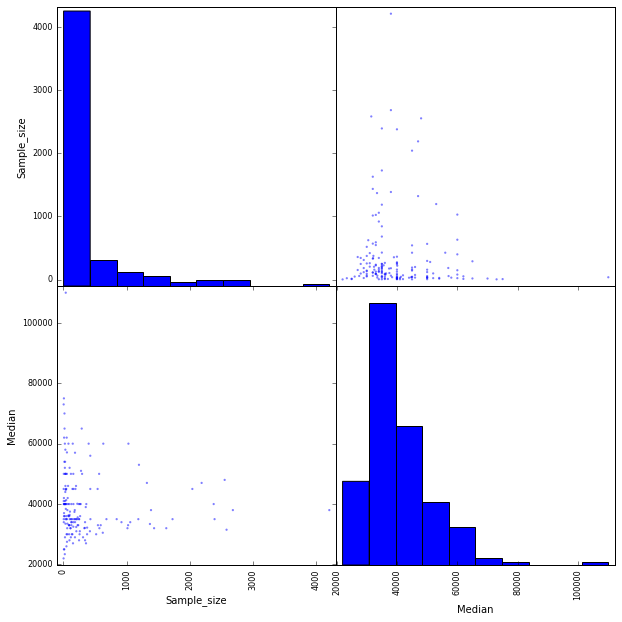

In [25]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bff71240>,
      dtype=object)

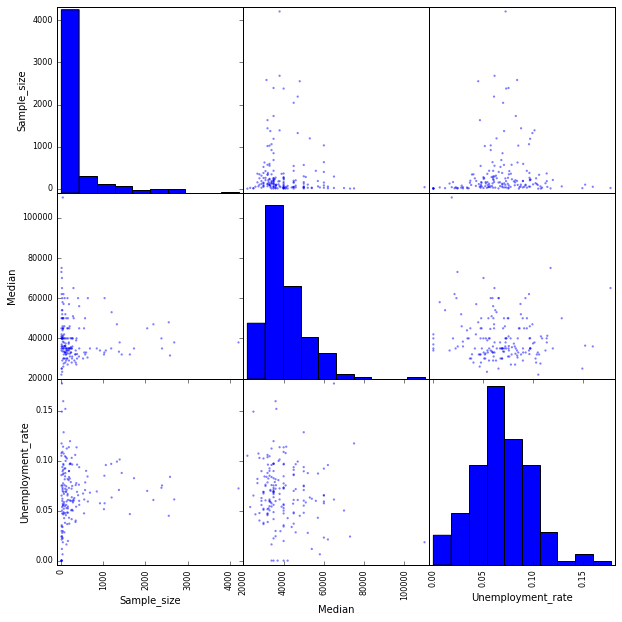

In [26]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], 
                   figsize=(10,10))

The scatter matrix plots give us the same information that we saw above, however now the information is collected and displayed all at once instead of as individual plots.

## Review Bar Plots

Next we will review bar plots to examine a few pieces of the data more closely.

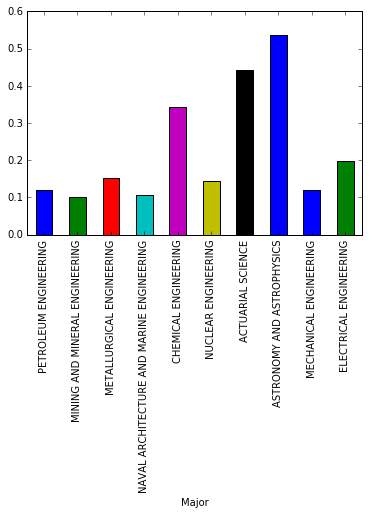

In [27]:
# look at first 10 and last 10 rows of data for ShareWomen
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

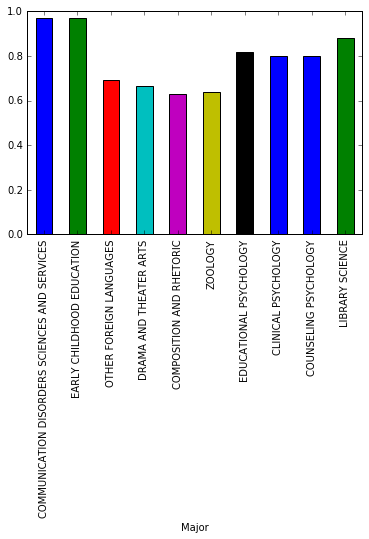

In [28]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

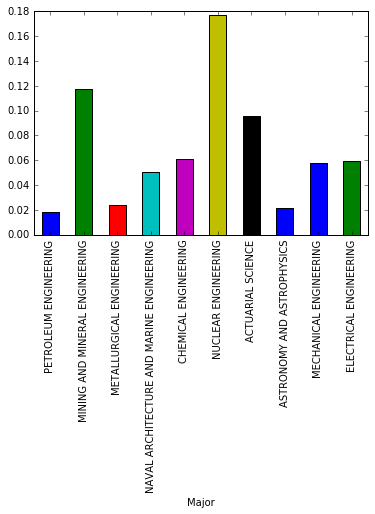

In [29]:
# look at first 10 and last 10 rows of data for Unemployment_rate
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)

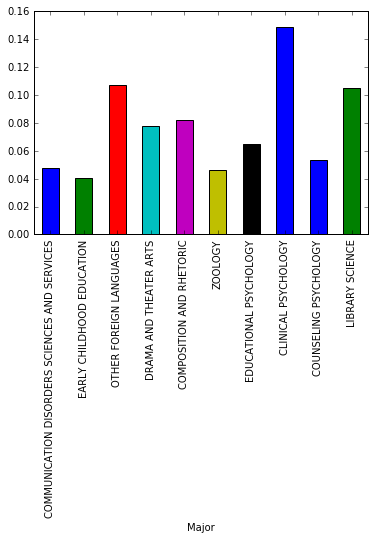

In [30]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

These bar graphs allow us to look at the values of ShareWomen or Unemployment_rate for an individual major.  For example, we can see that the nuclear engineering major has an unemployment rate of almost 18%.  This may be because there are few jobs available in this field, and it may be difficult to find jobs.

We can also see that Actuarial Science and Astronomy and Astrophysics have close to 50% women while many of the engineering majors have only about 10% women.

## Additional Plots

We will test out a few other plots below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bfde83c8>,
      dtype=object)

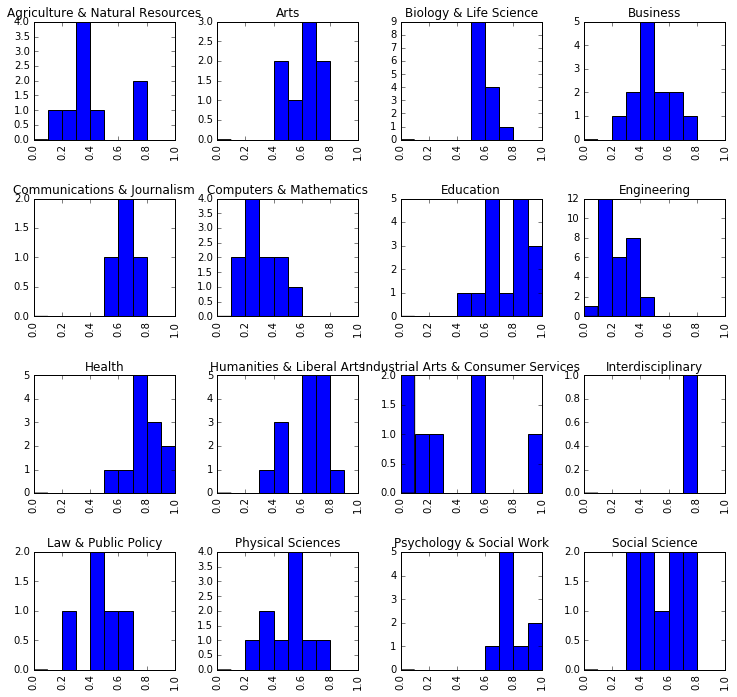

In [31]:
# grouped histogram
recent_grads['ShareWomen'].hist(by=recent_grads['Major_category'], 
                                    figsize=(12, 12), range=(0,1))

In the grouped histograms, we can easily see which majors are more female-dominant versus male-dominant.  By forcing all of the plots to use the same scale for the x-axis, we can see that engineering is predominantly male, while health is predominantly female.  Computers and math lean more male, while arts lean more female.  Majors in business, social science, and physical science appear to be more evenly distributed.

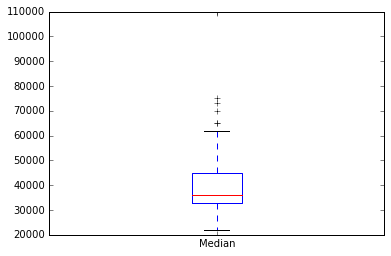

In [32]:
# box plot
recent_grads['Median'].plot.box()

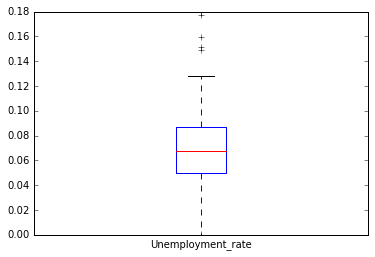

In [33]:
recent_grads['Unemployment_rate'].plot.box()

The box plots, or box and whisker plots, give us additional detail on the distributions of specific variables.

For example, in the above, we can see that the middle half of the median salaries are in the range from about 35,000 to about 45,000, and that there are some possible outliers above 60,000.

For the unemployment rate, we see that the interquartile range (the middle 50% of the data) is between about 5% and 8%.  We also see that the median unemployment rate is a little above 6%.

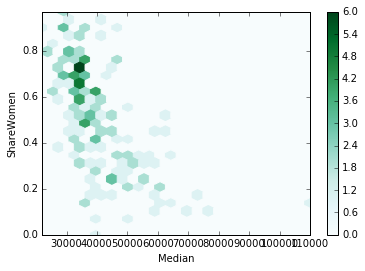

In [34]:
# hexagonal bin plot
recent_grads.plot.hexbin(x='Median', y='ShareWomen', gridsize=25, 
                             sharex=False)

This type of plot is useful when in a scatter plot, many of the dots fall on top of each other.  In this plot, the more dots from a scatter plot that would be in an area, the darker the color of that hexagon.

For example, we can see that for median salaries in the high 30's and the share of women near and above 70% is the most concentrated area.